In [5]:
#Importing libraries

import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from gensim import corpora, models
import string
import re
import spacy
import time
import nltk
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [6]:
#Loading data

data= pd.read_csv("./data/posts.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 22 columns):
_id                        10999 non-null object
activity_url               10999 non-null object
aggregated_at              10999 non-null object
author_followers_count     10999 non-null int64
author_klout_score         10999 non-null int64
author_picture_url         10999 non-null object
author_profile_url         10999 non-null object
author_real_name           10999 non-null object
author_username            10999 non-null object
hashtags                   10999 non-null object
index                      10999 non-null object
is_reshare                 10999 non-null bool
location                   10999 non-null object
network                    10999 non-null object
normalized_urls            10999 non-null object
parent_social_source_id    10999 non-null object
post_created_at            10999 non-null object
post_media                 10999 non-null object
raw_body_text

Find & count the named entities in the posts

In [43]:
# Converting the text to unicode

def make_unicode(input):
    if type(input) != unicode:
        input =  input.decode('utf-8')
        return input
    else:
        return input

data['raw_body_text']= data['raw_body_text'].apply(lambda text: make_unicode(text))

In [44]:
# Removing Emojis and Punctuations (Keeping # and $) 

def remove_emoji(input):
    return re.sub(r'[^A-Za-z0-9$#.]+', ' ', input)

data['raw_body_text']= data['raw_body_text'].apply(lambda text: remove_emoji(text))

In [45]:
#Loading english vocabulary for finding named entity

nlp= spacy.load('en')
tags={} # <- for storing tags in the form of key value pair

In [21]:
#Function to find named entities using spaCy package 

def get_entites(text):
    doc= nlp(text)
    for ent in doc.ents:
        tags[ent.text]= ent.label_

In [22]:
start_time= time.time()
%time data['raw_body_text'].apply(lambda text: get_entites(text))
print("--- %s seconds ---" % (time.time() - start_time))

CPU times: user 55min 13s, sys: 37min 54s, total: 1h 33min 8s
Wall time: 28min 48s
--- 1728.26889801 seconds ---


In [33]:
tags

{u'Chase Savings SM': u'ORG',
 u'360.00': u'CARDINAL',
 u'450713 443499 456008': u'DATE',
 u'Phil Bak': u'PERSON',
 u'the Northeastern Monthly Payment Plan': u'LAW',
 u'Inditex': u'ORG',
 u'5 to 15 minutes': u'TIME',
 u'JetBlue Business Card': u'ORG',
 u'Jamie Oliver': u'PERSON',
 u'Idea Bank': u'ORG',
 u'James L. Marshall Jr.': u'PERSON',
 u'LEENBANK BA': u'PERSON',
 u'Versicherungswissenschaft': u'ORG',
 u'roughly 85': u'CARDINAL',
 u'CF Brighton Chelsea 3': u'ORG',
 u'Franci L': u'ORG',
 u'Beleggen': u'ORG',
 u'SafeCharge International Group Ltd': u'ORG',
 u'Spieler': u'PERSON',
 u'LAST': u'DATE',
 u'NYSE RPAI': u'ORG',
 u'733931226704502': u'DATE',
 u'five foot eight': u'QUANTITY',
 u'Horizonte MG Dura': u'PERSON',
 u'PeterLeeds.com': u'PERSON',
 u'153.0': u'CARDINAL',
 u'220K miles': u'QUANTITY',
 u'Western': u'LOC',
 u'Bao125634 Premium': u'GPE',
 u'UMass': u'ORG',
 u'USA Kimberly Clark': u'ORG',
 u'the Wall Street Banks Natasha Lamb': u'ORG',
 u'Euro': u'PERSON',
 u'Zovirax Euro

In [29]:
df_tags= pd.DataFrame(columns=["name","entity_type"])

start_time= time.time()
for key, value in tags.iteritems():
    df_tags.loc[len(df_tags)]= [key,value]
print("--- %s seconds ---" % (time.time() - start_time))   

--- 482.060556173 seconds ---


Tried to add the name and the entites directly into the data frame. The operation ran for 6 hours and ultimately the kernel crashed. 

In [30]:
df_tags.head()

name entity_type
0                       Chase Savings SM         ORG
1                                 360.00    CARDINAL
2                   450713 443499 456008        DATE
3                               Phil Bak      PERSON
4  the Northeastern Monthly Payment Plan         LAW

In [37]:
for entity in df_tags["entity_type"].unique():
    print("------The number of the counts of the entity %s is-------" %entity)
    print(len(df_tags[df_tags["entity_type"]== entity]))

------The number of the counts of the entity ORG is-------
27751
------The number of the counts of the entity CARDINAL is-------
7435
------The number of the counts of the entity DATE is-------
10322
------The number of the counts of the entity PERSON is-------
18010
------The number of the counts of the entity LAW is-------
434
------The number of the counts of the entity TIME is-------
1441
------The number of the counts of the entity QUANTITY is-------
1267
------The number of the counts of the entity LOC is-------
858
------The number of the counts of the entity GPE is-------
4828
------The number of the counts of the entity MONEY is-------
5434
------The number of the counts of the entity EVENT is-------
579
------The number of the counts of the entity PRODUCT is-------
3113
------The number of the counts of the entity NORP is-------
1213
------The number of the counts of the entity WORK_OF_ART is-------
951
------The number of the counts of the entity FAC is-------
1677
------The

In [38]:
 df_tags[df_tags['entity_type']== "LANGUAGE"]

name entity_type
4157          Category    LANGUAGE
4798    Pplus1 la vida    LANGUAGE
6767           English    LANGUAGE
6870     Sparvorteil 4    LANGUAGE
9734             19 56    LANGUAGE
10968           Nakata    LANGUAGE
13265           408443    LANGUAGE
26257        Wettkampf    LANGUAGE
40837           Hebrew    LANGUAGE
47405           Solteq    LANGUAGE
50592           FRENCH    LANGUAGE
57249           Fijian    LANGUAGE
61340              TRP    LANGUAGE
66206            6.776    LANGUAGE
74400          6.6 230    LANGUAGE
74440          Napster    LANGUAGE
83509  Sparvorteil bis    LANGUAGE
83547         Mandarin    LANGUAGE

There are various packages in the pyhton for named entity recognition. Mainly two packages can be usedwo create tags 1.spaCY 2.NlTK. I my opinion, spaCy is better than the NLTK. I performed the operation using both the packages. First, spacy is faster than the ntlk. Second, NLTK tokenizes the sentence into individual text and thus the word losses its essence. For eg: For the sentecnce "San Fransico is a great city". Due to tokenization, NLTK recognises its has person.

## Creating Word Embedding to find any relations between the words

In [46]:
#Preprocessing the text

from nltk.corpus import stopwords
lemma = nltk.stem.WordNetLemmatizer()

def preprocessing(text):
    #1. Tokenization
    text= nltk.tokenize.casual_tokenize(text)
    
    #2. Convert text to lowercase
    text= [token.lower() for token in text]
    
    #3.Removing Blanks
    text= [token.strip() for token in text]
    
    #4.Removing Stopwords
    text= [token for token in text if token not in stopwords.words('english')]
    
    #5. Removing Punctuations (in this case only .)
    text= [token for token in text if token not in string.punctuation]
    
    return text

In [47]:
# Implenting preprocessing to the raw_body_text and store it as cleaned text
%time data['cleaned_text']= data['raw_body_text'].apply(lambda text: preprocessing(text))

CPU times: user 7min 56s, sys: 37.2 s, total: 8min 33s
Wall time: 8min 34s


In [48]:
# Creating corpora 
sentences= []
for text in data['cleaned_text']:
    sentences.append(text)

In [49]:
sentences

[[u'american',
  u'express',
  u'open',
  u'largest',
  u'location',
  u'centurion',
  u'lounge',
  u'john',
  u'f',
  u'kennedy',
  u'international',
  u'airport',
  u'terminal',
  u'4',
  u'read',
  u'http',
  u'amex.co',
  u'2ddzahs',
  u'#amexnews'],
 [u'american',
  u'express',
  u'card',
  u'members',
  u'get',
  u'#amexpresale',
  u'tickets',
  u'newly',
  u'announced',
  u'eagles',
  u'dates',
  u'saturday',
  u'september',
  u'22nd',
  u'san',
  u'diego',
  u'ca',
  u'petco',
  u'park',
  u'zac',
  u'brown',
  u'band',
  u'doobie',
  u'brothers',
  u'thursday',
  u'september',
  u'20th',
  u'san',
  u'francisco',
  u'ca',
  u'park',
  u'zac',
  u'brown',
  u'band',
  u'amex.co',
  u'2wqvqxq',
  u'tickets',
  u'go',
  u'sale',
  u'general',
  u'public',
  u'friday',
  u'january',
  u'19th',
  u'10am'],
 [u'mfkne',
  u'hebben',
  u'een',
  u'uitleg',
  u'binnen',
  u'en',
  u'het',
  u'komt',
  u'er',
  u'op',
  u'neer',
  u'dat',
  u'de',
  u'nieuwe',
  u'regeling',
  u'niet',


In [80]:
import multiprocessing

In [81]:
# Setting hyperparameters for Word2Vec model

min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed = 1

In [82]:
# Creating Word2Vec model
vec_model = models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [83]:
vec_model.build_vocab(sentences)

In [38]:
print("Word2Vec vocabulary length:", len(vec_model.wv.vocab))

('Word2Vec vocabulary length:', 53906)


In [42]:
#Training sentences on the model build

%time vec_model.train(sentences, total_examples=vec_model.corpus_count, epochs=vec_model.iter)

CPU times: user 11min 48s, sys: 1.59 s, total: 11min 49s
Wall time: 3min 7s


14808187

In [50]:
#  Compressing the vectors into 2D for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = vec_model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [52]:
vec_points= pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[vec_model.wv.vocab[word].index])
            for word in vec_model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [54]:
vec_points.head(15) # <--- To check whther the data is stored in the desired form or not

word          x          y
0       dacteur -21.686344  26.456255
1     parcheggi  38.270390  37.628242
2         sonja -12.022984   1.500789
3         cesse -22.500502  29.182850
4         woods  29.084032 -19.925072
5       hanging  25.539366 -33.354637
6         woody  26.120411 -29.831873
7     comically  16.375416 -18.631857
8     vlastitog  46.081783 -12.677714
9         prazo  14.697973  43.114727
10    vlastitom  42.130344 -20.750418
11        igual  -2.954019  48.887848
12  originality  -3.100608 -18.048521
13         14km  17.485813  -4.750675
14      miscela  41.081089  10.860341

In [55]:
vec_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53906 entries, 0 to 53905
Data columns (total 3 columns):
word    53906 non-null object
x       53906 non-null float64
y       53906 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


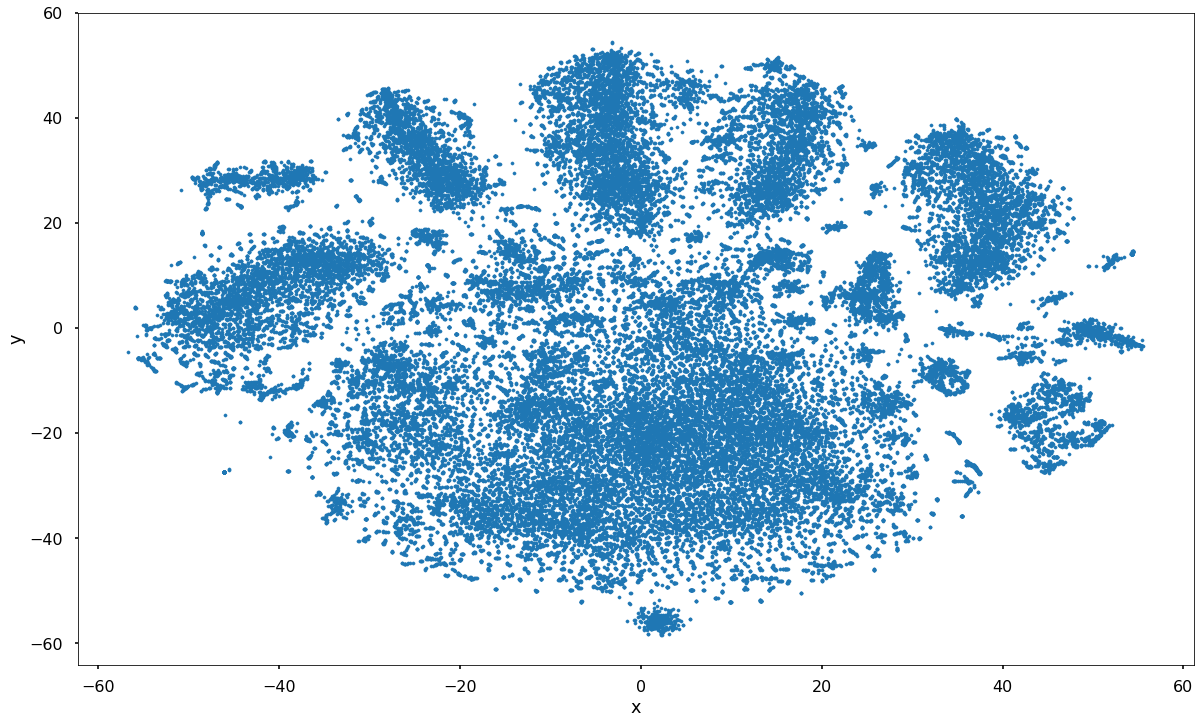

In [57]:
sns.set_context("poster")
vec_points.plot.scatter("x", "y", s=10, figsize=(20, 12))

Word vectors show interesting information about the data that are present in the raw_body_text. Words are forming cluster together. One of the main reasons can be due to the presence of the different languages in the text. Second some words are use for a particular context when compared to the other. For better visualization, so that we can zoom in the particualr section of the graph to see the detailings much better. 

In [63]:
# Creating scatter plot using iplot

# For Notebooks
init_notebook_mode(connected=True)

# For offline use
cf.go_offline()

Please uncomment and run the below cell to create the graph. I have commented it out beacuse it was slowing down the notebook.

In [67]:
# vec_points.iplot(kind='scatter',x='x',y='y',text='word',mode='markers',size=5)

In [68]:
# Word closest to given word

vec_model.most_similar('jamie')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[(u'dimon', 0.8721098899841309),
 (u'lobte', 0.7409220337867737),
 (u'bankchef', 0.739978015422821),
 (u'looming', 0.7351861000061035),
 (u'topolski', 0.709685742855072),
 (u'vanity', 0.7020566463470459),
 (u'stabil', 0.6986877918243408),
 (u'fiserv', 0.6945015788078308),
 (u'geblieben', 0.6933684945106506),
 (u'marie', 0.6872633695602417)]

In [69]:
vec_model.most_similar('american')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).



[(u'express', 0.995643138885498),
 (u'axp', 0.6250498294830322),
 (u'yellowbot', 0.5680685043334961),
 (u'icymi', 0.5613380670547485),
 (u'#axp', 0.5466997623443604),
 (u'blanche', 0.5460728406906128),
 (u'bankcard', 0.5404809713363647),
 (u'fidelity', 0.5333647131919861),
 (u'analysts.html', 0.5306491851806641),
 (u'1958', 0.5288604497909546)]

Above shows the words that have been used in the context with jamie and american. From similarity score, it is evident that word american is always used with express. It also picked up the axp and #axp which represents american express stock name. 

## Clustering the data

In [50]:
#Converting the text into the numbers so that it can be fed into machine laerning algorithms.

from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer= TfidfVectorizer(use_idf=True, ngram_range=(1,2))

In [52]:
% time tfidf_matrix= tfidf_vectorizer.fit_transform(data['raw_body_text'])

CPU times: user 12.9 s, sys: 140 ms, total: 13.1 s
Wall time: 13 s


In [53]:
tfidf_matrix.get_shape

<bound method csr_matrix.get_shape of <10999x934767 sparse matrix of type '<type 'numpy.float64'>'
	with 5178109 stored elements in Compressed Sparse Row format>>

In [54]:
feature_names= tfidf_vectorizer.get_feature_names()

In [81]:
# Function for creating multiple clusters

from sklearn.cluster import KMeans

def create_clusters(number_of_clusters):
    km= KMeans(number_of_clusters)
    km.fit(tfidf_matrix)
    return km.labels_.tolist()

Creating three differnet clusters to get the optimum number of cluster size. Elbow Method can be implemented to achieve more accurate number of clusters but it is time consuming.

In [84]:
% time cluster_1= create_clusters(5)

CPU times: user 25min 40s, sys: 8.18 s, total: 25min 48s
Wall time: 25min 53s


In [85]:
% time cluster_2= create_clusters(7)

CPU times: user 17min 28s, sys: 9.88 s, total: 17min 38s
Wall time: 17min 38s


In [86]:
% time cluster_3= create_clusters(10)

CPU times: user 29min 56s, sys: 17.6 s, total: 30min 14s
Wall time: 30min 16s


In [87]:
data['cluster_id_1']= cluster_1
data['cluster_id_2']= cluster_2
data['cluster_id_3']= cluster_3

In [89]:
print(data["cluster_id_1"].value_counts())
print(data["cluster_id_2"].value_counts())
print(data["cluster_id_3"].value_counts())

0    5865
4    3118
1     955
3     552
2     509
Name: cluster_id_1, dtype: int64
0    5114
3    2937
1     955
6     903
4     508
5     429
2     153
Name: cluster_id_2, dtype: int64
9    5268
6    3054
4     955
0     553
3     508
5     293
8     157
2      96
7      75
1      40
Name: cluster_id_3, dtype: int64


In [99]:
# Printing top 10 text of the different clusters if num of clusters is 10
print("Top raw data per cluster:")
for i in range(10):
    print("Cluster %d data:" % i)
    print(data['raw_body_text'][data['cluster_id_3']==i].head(10))

Top raw data per cluster:
Cluster 0 data:
26     Escapa de tu rutina cerca de Lima a respirar a...
56     Para que realices tu #PagoOportuno ya aceptamo...
57     Para que realices tu #PagoOportuno ya aceptamo...
58     Ac rcate a nuestros Centros de Atenci n y real...
59     Ya recibimos tu #PagoOportuno con tarjeta de c...
60     En todos nuestros Centros de Atenci n ya puede...
61     Para que realices tu #PagoOportuno ya aceptamo...
142    Os recomiendo la Meat Lovers F rmula lomoalto....
152    Para que realices tu #PagoOportuno ya aceptamo...
153    En todos nuestros Centros de Atenci n ya puede...
Name: raw_body_text, dtype: object
Cluster 1 data:
4539    Affordable Car Insurance Denton Tx . Effective...
4581    Admiral Car Insurance Change Direct Debit Date...
4611    Affordable Car Insurance Houston Texas . Less ...
4705    Admiral Car Insurance Direct Debit . Auto insu...
4840    Allstate Car Insurance Whitby . A guide to car...
5167    Aaa Car Insurance Houston Tx . Car insu

The above cell shows the various textual data that is present in the various clusters. 
Cluster 0 comprises of the data which is in spanish language.
Cluster 1 comprises of the data which is talking about some car insuarance.
Cluster 2 comprises of the data which contains MeganRockefeller #reginageorge #marissacoope.. it is most 
probably the instagram data of the coresponding hashtags.
Cluster 3 contains of the data regarding the centurion lounge that is being open by american express at JFK.
Cluster 4 contains the data regarding the hashtag #BlueMonday
Cluster 5 comprises of the data which is in german language
Cluster 7 comprises of the text A Trani si attendeva la sentenz.....
Cluster 8 comprises of the text which is in italian language
Cluster 9.. which is largest of all.. is regarding the american express card .. various promotions offered by the 
amrican express and the feedback regarding the card by various users.

In [100]:
# Printing top 10 text of the different clusters if num of clusters is 5
print("Top raw data per cluster:")
for i in range(5):
    print("Cluster %d data:" % i)
    print(data['raw_body_text'][data['cluster_id_1']==i].head(10))

Top raw data per cluster:
Cluster 0 data:
1     American Express Card Members can get #AmexPre...
2      mfkne We hebben een uitleg binnen en het komt...
3      annes3004 Je kan de geldigheid van je Award M...
4     The Amex Platinum is becoming even more useful...
5     Get your DAILY entry in to win a $2 000 AMEX g...
6     LAST CHANCE to win a $1 000 AMEX gift card and...
7     Hoy esta para uno as Conseguilo en 12 cuotas s...
8     #EbrointheMorning Presents Friends Family 2018...
9      Kyle Feldscher Hi Kyle I m so very sorry to h...
10     Gwanzo Hi Gwanz yes if you have the Gold or P...
Name: raw_body_text, dtype: object
Cluster 1 data:
239    Put your #BlueMonday blues behind you amp cele...
244    Put your #BlueMonday blues behind you amp cele...
277    Put your #BlueMonday blues behind you amp cele...
281     SandmanHotels Put your #BlueMonday blues behi...
282    Put your #BlueMonday blues behind you amp cele...
337    Put your #BlueMonday blues behind you amp cele...
378  

Trying to find some common topics within the the raw_text_data using latent dirichlet allocation so that it can be used majorly for the classification and clustering

In [102]:
%time dictionary= corpora.Dictionary(sentences)

CPU times: user 8.93 s, sys: 20 ms, total: 8.95 s
Wall time: 8.93 s


In [103]:
%time doc_term_matrix = [dictionary.doc2bow(text) for text in sentences]

CPU times: user 6.72 s, sys: 164 ms, total: 6.88 s
Wall time: 6.82 s


In [104]:
%time ldamodel1 = models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=5)

CPU times: user 10min 19s, sys: 17.7 s, total: 10min 37s
Wall time: 10min 19s


In [105]:
%time ldamodel2 = models.ldamodel.LdaModel(doc_term_matrix, num_topics=10, id2word = dictionary, passes=5)

CPU times: user 12min 20s, sys: 1min 21s, total: 13min 42s
Wall time: 12min 5s


In [111]:
for topic in ldamodel2.show_topics(num_topics=10, formatted=False, num_words=20):
    print("Topic {}: Words: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: Words: 
[u'card', u'credit', u'di', u'cards', u'per', u'account', u'sugar', u'cash', u'il', u'use', u'che', u'pay', u'purchases', u'fee', u'offers', u'amex', u'bank', u'rewards', u'american', u'express']
Topic 1: Words: 
[u'der', u'e', u'und', u'la', u'bitcoin', u'un', u'l', u'von', u'r', u'f', u'le', u'0', u'si', u'del', u'con', u'83', u'das', u'zu', u'da', u'1']
Topic 2: Words: 
[u'1', u'istock', u'e3', u'good', u'buy', u'2', u'81', u'http', u'dick', u'code', u'new', u'15', u'10', u'2018', u'price', u'80', u'visa', u'images', u'3', u'sell']
Topic 3: Words: 
[u'experience', u'sitecore', u'market', u'services', u'company', u'work', u'careers', u'den', u'customer', u'well', u'customers', u'jobs', u'business', u'team', u'report', u'management', u'years', u'new', u'global', u'insight']
Topic 4: Words: 
[u'die', u'bank', u'said', u'...', u'pay', u'industry', u'growth', u'technology', u'et', u'companies', u'des', u'financial', u'citi', u'banks', u'les', u'united', u'gender', u'u', 

In [135]:
ldamodel1_transformed= ldamodel1[doc_term_matrix]
print(ldamodel1_transformed)

In [114]:
# Using sklearn to find the topic words

from sklearn.decomposition import LatentDirichletAllocation
lda_sklearn= LatentDirichletAllocation(n_components=10, max_iter=5, random_state=1)

In [116]:
% time lda_sklearn.fit(tfidf_matrix)

/usr/local/lib/python2.7/dist-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning:

The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.



CPU times: user 19min 9s, sys: 3min 48s, total: 22min 57s
Wall time: 18min 59s


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=5,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=1,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [117]:
for topic_idx, topic in enumerate(lda_sklearn.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-10 - 1:-1]]))
        print()

Topic #0:
em de e3 do os para na es da um
()
Topic #1:
the to and of in you for your card is
()
Topic #2:
za operativebank mastercard https it black bir poor babies georgiadirtroad tomborelli tomborelli poor babies they limit mastercard
()
Topic #3:
ripple ban on ban with ripple goes further hk ripple bitcoin back https americanexpress did had experience
()
Topic #4:
cocacola coke cherhorowitz cherhorowitz blairwaldorf serenavanderwoodsen cherhorowitz marissacooper theoc princeharry meganrockefeller blairwaldorf theoc coke theoc
()
Topic #5:
looping in looping realizar tu puedes realizar atenci ya at kmart 100 back groupon sale hyatt sale kmart hyatt
()
Topic #6:
die der und centurion lounge centurion jfk lounge von jfk terminal opening centurion
()
Topic #7:
visagiftcard and applemusicapp applemusicapp americanexpressgiftcard itunes and merchantcard visagiftcard mastercard on itunes music on reason made
()
Topic #8:
de la en que di el ng del un por
()
Topic #9:
ceo ken express ceo ken

Constructed two LDA models using gensim and sklearn.. Gensim performed way better than the sklearn. Sklearn picked up the common stopwords like 'from, 'to' ..which is not the case of gensim. And since gensim uses word2vec (the pretained neural network model) to build the model.. it takes half the time than sklearn.

In [122]:
%time lda_sklearn_transform= lda_sklearn.transform(tfidf_matrix)

CPU times: user 9.6 s, sys: 9.96 s, total: 19.6 s
Wall time: 5.91 s


In [123]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print "Topic %d:" % (topic_idx)
        print " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print documents[doc_index]

In [127]:
display_topics(lda_sklearn.components_,lda_sklearn_transform,feature_names,data['raw_body_text'], 5, 5)

Topic 0:
em de e3 do os
Ubezpieczenie turystyczne jest coraz bardziej drogie i trudne do zdobycia gdy stajesz si starszy szczeg lnie gdy przekraczasz 65 rok ycia gdzie redni roczny koszt wynosi ponad 80 . Wybieranie w a ciwego ubezpieczenia na wakacje staje si coraz bardziej uci liwe wraz z wiekiem poniewa ubezpieczyciele widz Ci jako bardziej nara onego na choroby czy uszkodzenia. Jednak poza wi kszym kosztem ubezpieczenie turystyczne jest identyczne jak ochron dla m odszych podr nik w. Obejmuje ochron przeciwko nieprzewidzianym sytuacjom kt re mog wydarzy si zar wno przed Twoimi wakacjami jak i w czasie ich rwania. Przed zakupieniem ochrony zapoznaj si z wa nymi informacjami o kt rych powiniene wiedzie . Ubezpieczenie polega na ochronie przed zdarzeniami nieprzewidywalnymi. Mo esz si zastanawia Po co mi takie ubezpieczenie przecie nawet mi si nie przyda . Ale w tym w a nie s k e ubezpieczenie turystyczne chroni Ci przed nieprzewidzianym wydarzeniami kt re mog pojawi si przed lub w tr

the to and of in
BALDEV RAM MIRDHA INSTITUTE OF TECHNOLOGY A Project Study Report on Analytical study of Indian stock market Jaipur 2008 2010 For Partial Fulfillment of M.B.A Part II Submitted To RAJASTHAN TECHNICAL UNIVERCITY KOTA Guided by Submitted by Faculty Members Anshul Sharma MBA department Acknowledgement The completion of any project depends upon the co operation coordination and combined efforts of several resources of knowledge inspiration energy. Words fall short acknowledging immense support lent to me yet I will try to give full credit to the deserver s. I would like to take this opportunity to thank SHRIRAM INSIGHT SHARE BROKERS LTD. for giving me the experience and exposure to Financial Services Industry. This project bears the effort of many people I am indebted to Mr. Mahipal singh choudhary Rajasthan head Shriram Insight Ltd. JAIPUR who gave me this golden opportunity to work with Shriram insight Ltd. I would also like to thanks Mr. Pawan pandey Shriram Insight Ltd 

za operativebank mastercard https it black bir
#GoaUrbanCo operativeBank#GopinathPatilParsikJanataSahakariBank#GreaterBombayCo operativeBank#JalgaonJanataSahakariBank#JanakalyanSahakariBank#JanalaxmiCo operativeBank#JanataSahakariBank#JunagadhCommercialCo operativeBank#KallappannaAwadeIchalkaranjiJanataSahakariBank#KalyanJanataSahakariBank#KaradUrbanCo operativeBank#MahanagarCo operativeBank#MapusaUrbanCo operativeBankofGoa#NagarUrbanCo operativeBank#NasikMerchant sCo operativeBank#NewIndiaCo operativeBank#NKGSBCo operativeBank#PravaraSahakariBank#Punjab MaharashtraCo operativeBank#RupeeCo operativeBank#SangliUrbanCo operativeBank#SaraswatCo operativeBank#ShamraoVithalCo operativeBank#SolapurJanataSahakariBank#ThaneBharatSahakariBank#TheKapoleCo operativeBank#TJSBSahakariBank#ZoroastrianCo operativeBank#NagpurNagrikSahakariBank#ShikshakSahakariBank#AkolaJanataCommercialCo operativeBank#AkolaUrbanCo operativeBank#KhamgaonUrbanCo operativeBank#MuneshwraswamyBANK#EenaduUrbanCooperativeBan

ripple ban on ban with ripple goes further
#Lanson #Wine #ChampagneLanson #LeFooding #TheArtOfPlating #GastronoGram #Food #Foodie #FoodPorn #GastroArt #InstaFood #Instagramers #FoodGasm #FollowMe #FoodStagram #YoLo #FoodPics #PhotoOfTheDay #BestOfTheDay #Foodspiration #IGDaily #Delicious #Amazing #Yummy #RealFoodz #CNNFood #MyChefsTable ElaineLai10 #Champagne LeFooding MichelinRestaurants Michelin MichelinInspectors MichelinStarFood TheBestChefsOfTheWorld ChefsTalk #ChefsTalk FineDiningLovers #MichelinStar BestFoodHongKong FOTD.HK TheArtOfPlating GastronoGram LeFooding GastroArt EliteLifeAndTravel Eater Thrillist Emirates AmericanExpress HongKong.HK HongKong.HK Wagyu Beef FoodAndWine FoodRepublic Food52 Wine Travel Food HKAirlines RoyalCopenhagen Carlsberg FoodPanda HongKong Deliveroo HK GordonGram LeFooding ChateauHautBrion Champagne XS LanghamHK LanghamHotels ThisIsInsiderFood DiscoverHongKong WOMGuide CraveMagazineHK TimeOutHK AFoodieWorld HongKong.HK ChampagneLansonUK ChampagneLans

visagiftcard and applemusicapp applemusicapp americanexpressgiftcard itunes and
Protraiture belladally By Amex Photography contact whatsapp 012 466 9941 . . . #Wedding #amexphotography #photobyamexphotography #byamexphoto #amexphoto #amex #amex photograhy #lovefebruaryphotography #WeddingPhotographer #WeddingFilm #vscocam #Penang #penangphotographer #PhotographerMalaysia #malayweddinguide #Photoshoot #makeup #akadnikah #solemnization #weddingdress #ringshot #malaysiaweddingpackage #kerjakahwin #gambarkahwin #pelamin #postwedding #engagement #prewedding #malaywedding #kualalumpur
#MardiGras #Party #Music on #iTunes and #AppleMusicApp HUEY https t.co RRmNWEZY2y #Clubbing #Dancing #Turnup #theTurnUp #iTunesGiftCard #iTunesCard #AmericanExpressGiftCard #VisaGiftCard #MasterCard #MerchantCard.
#MardiGras #Party #Music on #iTunes and #AppleMusicApp HUEY https t.co RRmNWEZY2y #Clubbing #Dancing #Turnup #theTurnUp #iTunesGiftCard #iTunesCard #AmericanExpressGiftCard #VisaGiftCard #MasterCard #

ceo ken express ceo ken chenault ken chenault https
Akcij karusel kaip parduoti be nuolaidos Daugelis versl iandien gyvena nuolatin je akcij karusel je vien kart pasi lius nuolaid klientai to reikalauja ir antr ir tre i savait . Potencial s u sakovai da niausiai tikisi nuolaid kai nemato ai kios vert s u kuri tur t mok ti papildomai arba jau ia neprofesionali deryb taktik . Yra daugyb svarbi dalyk kurie iandien reikalingi geram pardav jui ta iau s kmingiausieji pirmiausia i siskiria stipria ir tikslia pardav jo m stysena gerais prekybininko geb jimais ir eina koja kojon su laiku panaudodami naujausi technologij galimybes. Tai i skiria s km s lydimus pardav jus nuo vidutiniok teigia Andy Prestonas pardavimo konsultantas dirbantis su IBM Siemens BMW American Express FedEx ir daugybe kit did i j pasaulini preki enkl . Ne ma iau svarbu naujausi technologij sprendim suteikiamas galimybes pasitelkti ir skaitmenin je erdv je LinkedIn interneto svetain je tiesiogiai bendraujant su klientu inte

Considering the topic words spitted by the LDA model.. It is showing almost the similar information given by the 
clusters earlier formed. The granuality of the topics are limited due to use of the different languages and the plethora of topics. 

##  Additional Insights regarding the data

In [56]:
data['length_of_text']= data['raw_body_text'].apply(lambda text: len(text))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4037e21890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4037bd7b90>]], dtype=object)

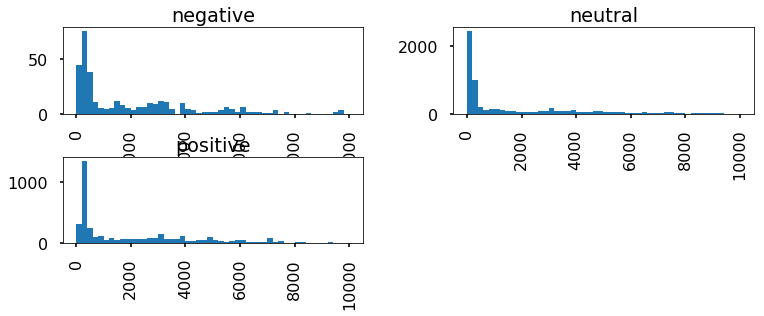

In [146]:
data.hist(column= 'length_of_text', by= 'sentiment_category', bins=50,figsize=(12,4), range=(0,10000))

In [150]:
for category in data['sentiment_category'].unique():
    print("--- Average length of %s  messages  ---" %category)
    print(np.mean(data['length_of_text'][data['sentiment_category']== category]))

--- Average length of neutral  messages  ---
2065.70564581
--- Average length of positive  messages  ---
2684.18455616
--- Average length of negative  messages  ---
3042.6010929


In [57]:
for network in data["network"].unique():
    print("-------Average length of the data for the %s is------"%network)
    print(np.mean(data['length_of_text'][data['network']== network]))

-------Average length of the data for the facebook is------
814.98
-------Average length of the data for the twitter is------
166.261323216
-------Average length of the data for the instagram is------
438.828169014
-------Average length of the data for the automattic is------
4537.8655303
-------Average length of the data for the rss is------
4095.90702588
-------Average length of the data for the disqus is------
450.368421053
-------Average length of the data for the tumblr is------
4188.6652452
-------Average length of the data for the reddit is------
385.099489796
-------Average length of the data for the google_plus is------
1016.671875
-------Average length of the data for the reviews is------
327.5


# Classification of the data

Trying to classify the "raw_body_text" using sklearn package. Since there is no target variable.. I am trying to classify data on the basis of the network. If the target column changes, same script can be re run with different column . Since the network is classification is sophisticated, higher degree of the accuracy can be expected..  

In [58]:
# Importing all the neccessary libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score

In [63]:
tfidf_matrix

<10999x934767 sparse matrix of type '<type 'numpy.float64'>'
	with 5178109 stored elements in Compressed Sparse Row format>

In [61]:
#Spliting into the test and train ratio

X= tfidf_matrix
y= data['network']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [73]:
def fit_classifier(clf,X_train, y_train):
    clf.fit(X_train, y_train)

def predicted_labels(clf,features):
    return(clf.predict(features))

A = MultinomialNB()
B = DecisionTreeClassifier()
C = AdaBoostClassifier()
D = KNeighborsClassifier()
E = RandomForestClassifier()
F= SVC(kernel='sigmoid')
G= MLPClassifier()

clf= [A,B,C,D,E,F,G]
predicted_values= [0,0,0,0,0,0,0]

for i in range(0,7):
    start_time= time.time()
    fit_classifier(clf[i], X_train, y_train)
    y_predict= predicted_labels(clf[i],X_test)
    predicted_values[i]= f1_score(y_test, y_predict, average= "micro")
    print('f1 score for the classifier %s is ' %clf[i])
    print(predicted_values[i])
    print("--- %s seconds ---" % (time.time() - start_time))

f1 score for the classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is 
0.721454545455
--- 1.25259900093 seconds ---
f1 score for the classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') is 
0.815636363636
--- 201.481435061 seconds ---
f1 score for the classifier AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) is 
0.637090909091
--- 775.271266937 seconds ---
f1 score for the classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') is 
0.757818181818
--- 7.59771704674 secon

Based on the F1-score, neural net performed better. It was expected. Genrally, Naive Bayes and Neural Net perform better but neural net takes some time to train. Now the performance of the classifier can be improve using the grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.01, 0.1]}   #<--- alter aplha parameter of the classifier
grid = GridSearchCV( MultinomialNB(),param_grid,refit=True,verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

grid_predictions= grid.predict(X_test)
print(classification_report(y_test, grid_predictions))                           

  Since neural net performs better under these conditions, deep learning can also be implemented. CNN can be used . The word2vec model can be used as the input to the CNN network. Basic CNN can be made and through dropout and adding layers, desired level of accuracy can be achieved. 

Since 23824 is very number, the input matrix will be large and will require high computational power to execute the code. 